In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.p as plt

url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate"

try:
    resp = requests.get(url)
except Exception as e:
    print("Invalid url")
    raise e

soup = BeautifulSoup(resp.text, 'html')
table = soup.find_all('table')[0]

data_columns = table.find_all('th')
data_columns = [name.text.strip() for name in data_columns]

data_columns.remove('Yearly Crime Rates per 100,000 people')
data_columns.remove('Violent crime')
data_columns.remove('Property crime')

data_columns[3] = 'Total (Violent and Property)'
data_columns[9] = "Total Violent"
data_columns[13] = "Total Property"

element = data_columns.pop(4)
data_columns.insert(13, element)

crime_data = pd.DataFrame(columns = data_columns)
column_data = table.find_all('tr')

for row in column_data[3:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    crime_data.loc[len(crime_data)] = individual_row_data

In [6]:
crime_data.at[0, 'City'] = 'Mobile'
crime_data.at[26, 'City'] = 'Stockton'
crime_data.at[73, 'City'] = 'Toledo'
crime_data.at[81, 'City'] = 'Arlington'
crime_data.at[47, 'City'] = 'Louisville Metro'

In [7]:
new_columns = {'Murder andNonnegligentmanslaughter': 'Murder/Manslaughter', 
               'Rape1': 'Rape',
               'Aggravatedassault': 'Assault',
               'Larceny-theft': 'Larceny/Theft',
               'Motorvehicletheft': 'Vehicle Theft',
               'Arson2' : 'Arson'}
crime_data.rename(columns = new_columns, inplace=True)

In [8]:
crime_data['Population'] = pd.to_numeric(crime_data['Population'].replace(',', '', regex=True), errors='coerce')
crime_data['Total Property'] = pd.to_numeric(crime_data['Total Property'].replace(',', '', regex=True), errors='coerce')
crime_data['Larceny/Theft'] = pd.to_numeric(crime_data['Larceny/Theft'].replace(',', '', regex=True), errors='coerce')
crime_data['Burglary'] = pd.to_numeric(crime_data['Burglary'].replace(',', '', regex=True), errors='coerce')
crime_data['Vehicle Theft'] = pd.to_numeric(crime_data['Vehicle Theft'].replace(',', '', regex=True), errors='coerce')
crime_data['Assault'] = pd.to_numeric(crime_data['Assault'].replace(',', '', regex=True), errors='coerce')
crime_data['Rape'] = pd.to_numeric(crime_data['Rape'].replace(',', '', regex=True), errors='coerce')
crime_data['Arson'] = pd.to_numeric(crime_data['Arson'].replace(',', '', regex=True), errors='coerce')
crime_data['Total Violent'] = pd.to_numeric(crime_data['Total Violent'].replace(',', '', regex=True), errors='coerce')

crime_data['Total (Violent and Property)'] = pd.to_numeric(crime_data['Total (Violent and Property)'], errors='coerce')
crime_data['Murder/Manslaughter'] = pd.to_numeric(crime_data['Murder/Manslaughter'], errors='coerce')
crime_data['Robbery'] = pd.to_numeric(crime_data['Robbery'], errors='coerce')

In [9]:
crime_data.to_csv('crime_data.csv')

In [10]:
crime_data

,State,City,Population,Total (Violent and Property),Murder/Manslaughter,Rape,Robbery,Assault,Total Violent,Burglary,Larceny/Theft,Vehicle Theft,Total Property,Arson
0,Alabama,Mobile,248431,6217.02,20.13,58.16,177.11,485.85,740.25,1216.84,3730.21,506.78,5453.83,22.94
1,Alaska,Anchorage,296188,6640.04,9.12,132.01,262.67,799.49,1203.29,748.17,3619.66,1047.98,5415.82,20.93
2,Arizona,Chandler,249355,2589.08,2.01,52.13,56.95,148.68,259.47,314.41,1866.01,149.18,2329.61,NaN
3,Arizona,Gilbert,242090,1483.75,2.07,16.11,21.07,46.26,85.51,192.49,1137.59,55.76,1385.85,12.39
4,Arizona,Glendale,249273,5037.85,4.81,38.91,192.96,251.53,488.22,637.45,3426.36,466.56,4530.37,19.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Virginia,Virginia Beach,454353,2083.40,3.08,22.45,59.87,52.16,137.56,165.95,1667.65,101.02,1934.62,11.22
96,Washington,Seattle,721365,5911.99,3.74,36.87,210.02,382.05,632.69,1081.98,3673.45,503.21,5258.64,20.66
97,Washington,Vancouver,217066,7881.01,2.76,109.64,105.50,408.63,626.54,1023.19,5408.03,800.22,7231.44,23.03
98,Wisconsin,Madison,255850,3040.46,4.30,37.13,82.86,250.15,374.44,362.32,2130.94,168.85,2662.11,3.91


In [11]:
missingval_col = ['Rape', 'Total Violent', 'Arson']

#Get mean within each column
mean_values = crime_data[missingval_col].mean() 

#Fill with mean imputation
crime_data[missingval_col] = crime_data[missingval_col].fillna(mean_values)

AttributeError: module 'matplotlib' has no attribute 'savefig'

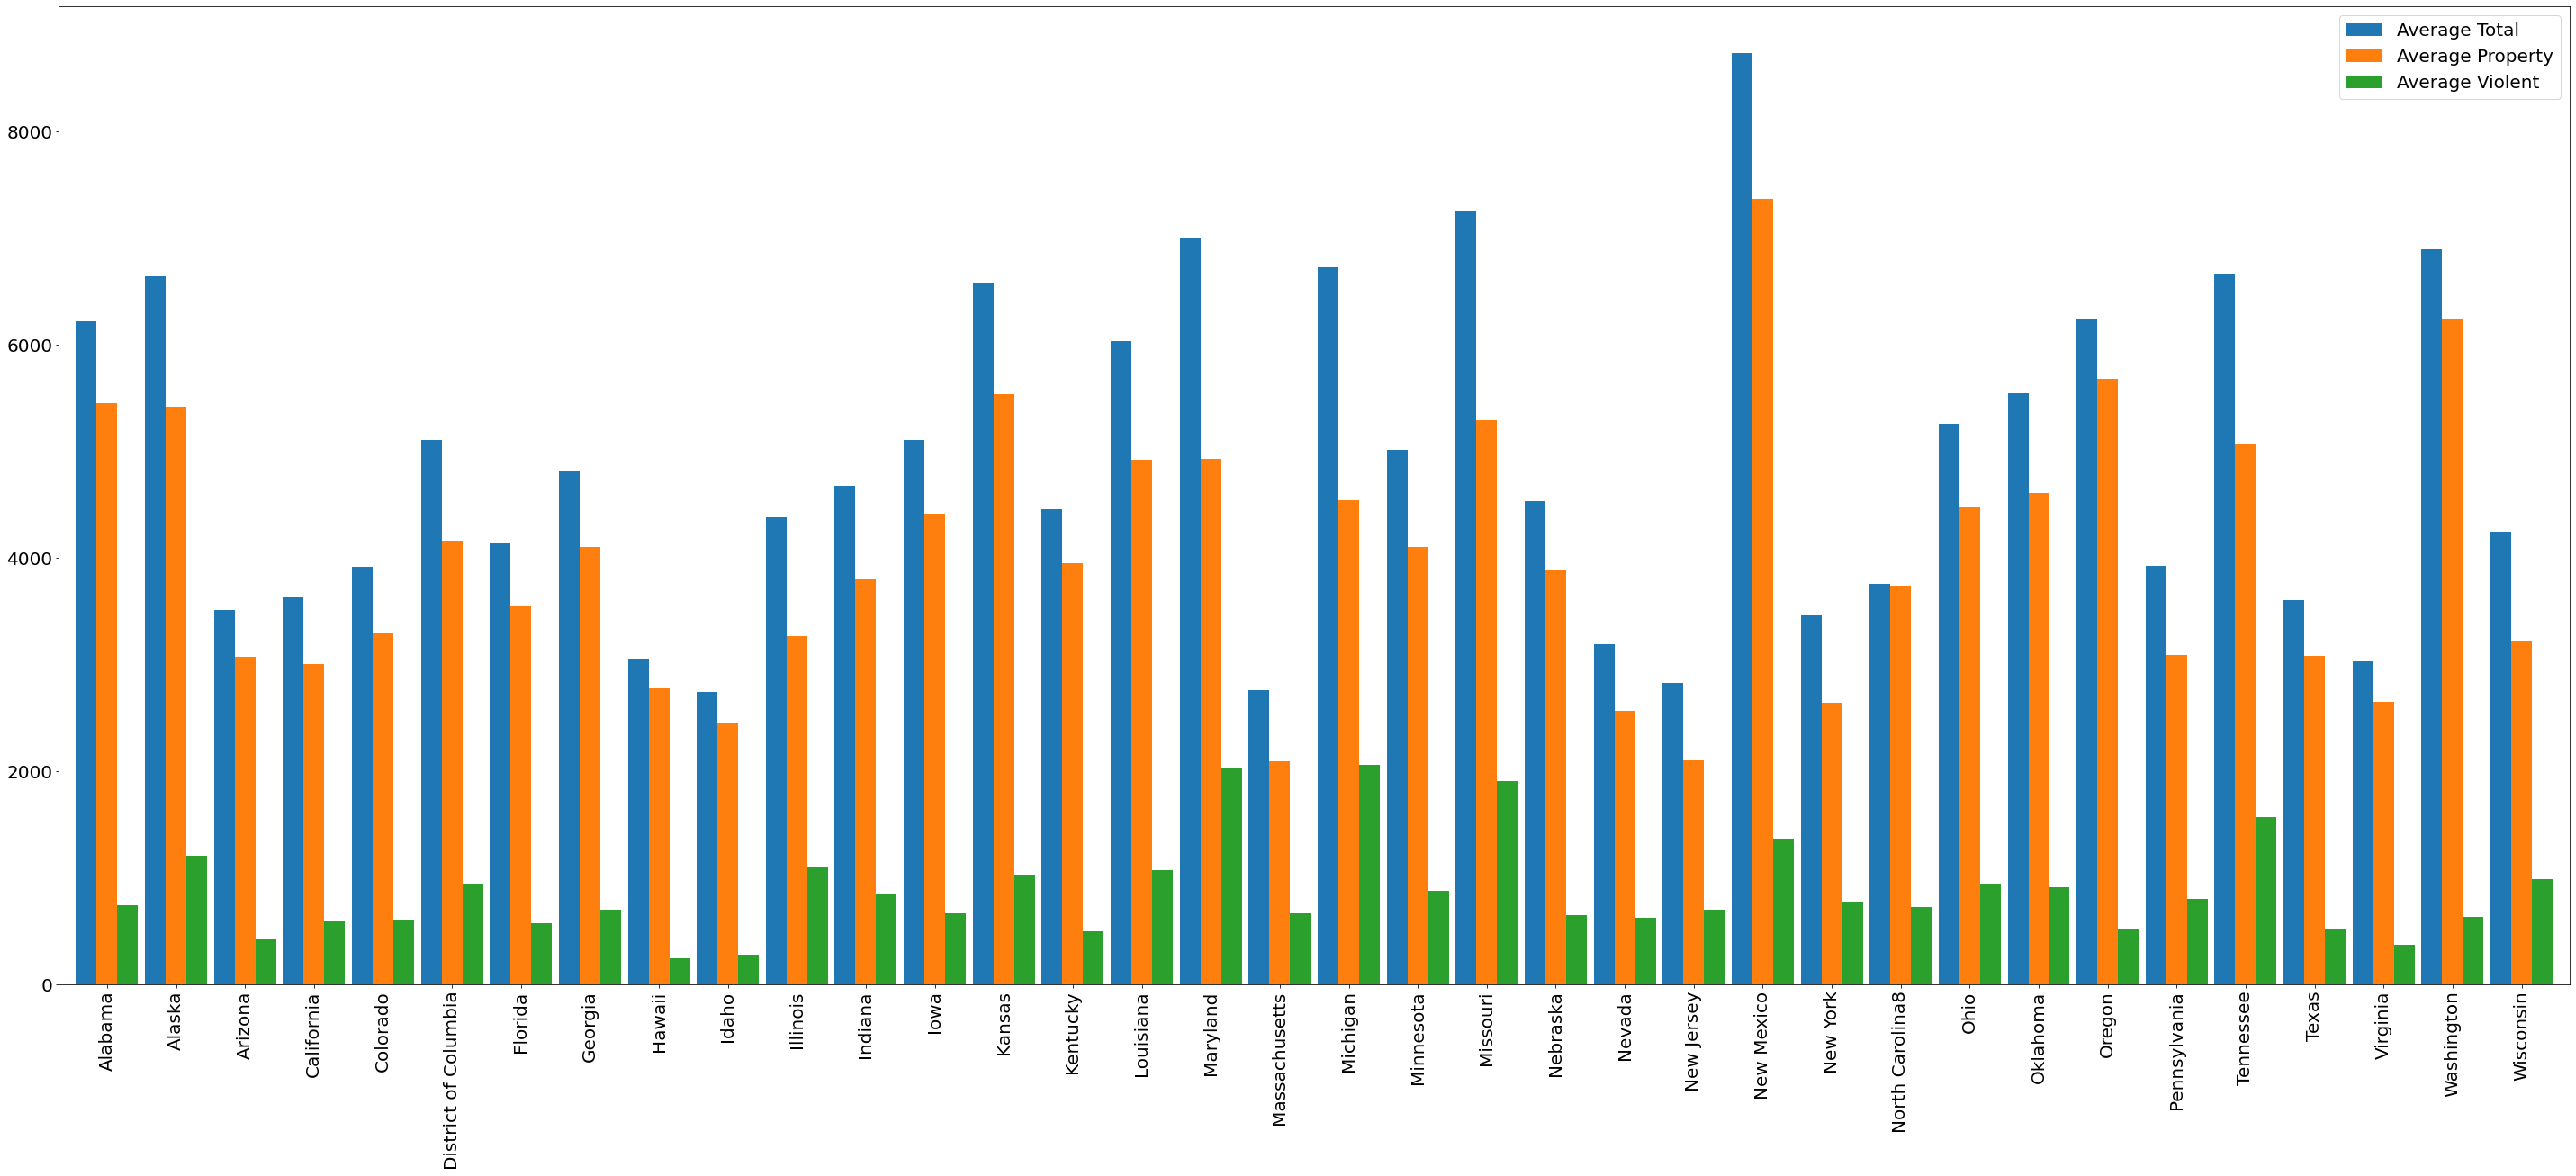

In [12]:
state_totals_dict = {state: {} for state in crime_data['State'].unique()}
for state in crime_data['State'].unique():
    state_total_sum = sum(crime_data.loc[crime_data['State'] == state, 'Total (Violent and Property)'])
    state_total_average = state_total_sum/len(crime_data.loc[crime_data['State'] == state])
    state_violent_sum = sum(crime_data.loc[crime_data['State'] == state, 'Total Violent'])
    state_violent_average = state_violent_sum/len(crime_data.loc[crime_data['State'] == state])
    state_property_sum = sum(crime_data.loc[crime_data['State'] == state, 'Total Property'])
    state_property_average = state_property_sum/len(crime_data.loc[crime_data['State'] == state])
    state_totals_dict[state] = {'Average Total' : state_total_average, 'Average Property' : state_property_average, 'Average Violent' : state_violent_average}

# Murder, aggravated assault, motor vehicle theft
state_specs_dict = {state: {} for state in crime_data['State'].unique()}
for state in crime_data['State'].unique():
    state_murder_sum = crime_data.loc[crime_data['State'] == state, 'Murder/Manslaughter']
    state_murder_average = state_murder_sum/len(crime_data.loc[crime_data['State'] == state])
    state_aggrass_sum = crime_data.loc[crime_data['State'] == state, 'Assault']
    state_aggrass_average = state_aggrass_sum/len(crime_data.loc[crime_data['State'] == state])
    state_motortheft_sum = crime_data.loc[crime_data['State'] == state, 'Vehicle Theft']
    state_motortheft_average = state_motortheft_sum/len(crime_data.loc[crime_data['State'] == state])
    state_specs_dict[state] = {'Average Murder' : state_murder_average, 'Average Assault' : state_aggrass_average, 'Average Vehicle Theft' : state_motortheft_average}


# DATA VIZ

# bar graph of state total averages
ax = pd.DataFrame(state_totals_dict).T.plot(kind = 'bar', figsize = (50, 20), width = 0.9)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.legend(fontsize=20)

plt.savefig('state_total_averages.png', bbox_inches='tight')